<a href="https://colab.research.google.com/github/mehadisaki/Operation_research/blob/main/Criticalpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network model & Critical Path Method (CPM)

The Network model is a database model that shows the relationships among the objects. The diagram of network model is viewed as a graph with nodes and connecting links. In the network model, the objects are seen as nodes and the relationships between the objects are showed as the semicircles.

Critical Path Method (CPM) or critical path analysis (CPA), is an algorithm for scheduling a set of project activities. It is commonly used in conjunction with the program evaluation and review technique (PERT). A critical path is determined by identifying the longest elasticity of dependent activities and measuring the time required to complete them from start to finish.

In this Notebook, explore the ways to use Python to look for and visualize critical paths in projects.

# Library Setup

In [ ]:
pip install networkx


In [ ]:
pip install criticalpath

In [ ]:
import datetime

import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node
import plotly.express as px
from IPython.display import Image


# Set Up the Tasks and Visualize the Dependencies

In the task list, each tuple contains the name of the task and any attribute(s) of the task; the attribute(s) should be presented in a dictionary.

In the dependency list, each tuple contains two tasks, with the second one dependent on the first.

In [ ]:
# Define task with duration
task = [('A',{'Duration':2}),('B',{'Duration':5}),('C',{'Duration':4}),
        ('D',{'Duration':5}),('E',{'Duration':7}),('F',{'Duration':3}),
        ('G',{'Duration':3}),('H',{'Duration':6}),('I',{'Duration':2}),
        ('J',{'Duration':5}),('K',{'Duration':4}),('L',{'Duration':3}),
        ('M',{'Duration':12}),('N',{'Duration':8})]

# Definee dependency

depend = [('B','D'),('A','E'),('A','F'),('B','G'),('C','H'),('D','H'),
          ('C','I'),('D','I'),('E','J'),('F','K'),('G','K'),('H','K'),
          ('F','L'),('G','L'),('H','L'),('I','M'),('J','N'),('K','N')]


In [ ]:
G = nx.DiGraph()

In [ ]:
#add nodes and linkegs
G.add_nodes_from(task)
G.add_edges_from(depend)

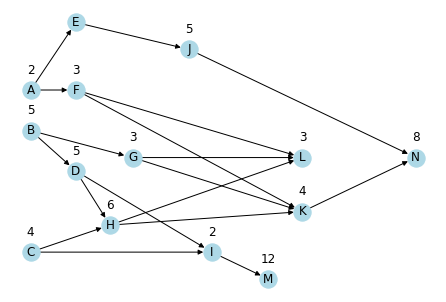

In [ ]:
# set up the (arbitrary) positions of the tasks (nodes):
pos_nodes = {"A": (1, 15), 
             "B": (1, 12), 
             "C": (1, 3), 
             "D": (5, 9), 
             "E": (5, 20),
             "F": (5, 15),
             "G": (10, 10),
             "H": (8, 5),
             "I": (17, 3),
             "J": (15, 18),
             "K": (25, 6),
             "L": (25, 10),
             "M": (22, 1),
             "N": (35, 10)}                 
             
             
           
# draw the nodes
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=10)


# set up the (arbitrary) positions of the durations labels (attributes):
pos_attrs = {node:(coord[0], coord[1] + 1.5) for node, coord in pos_nodes.items()}
attrs = nx.get_node_attributes(G, 'Duration')

# draw (write) the node attributes (duration)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs)


# set a little margin (padding) for the graph so the labels are not cut off
plt.margins(.01)
plt.savefig("Network.png")

# Critical path analysis


## Initialization & update the project info

In [ ]:
# initialize the critical path package
proj = Node('Project')

#add task and duration

for t in task:
  proj.add(Node(t[0],duration=t[1]["Duration"] ))

#add dependency

for d in depend:
  proj.link(d[0],d[1])

# upadate

proj.update_all()


## Get critical path and Project Duration

In [ ]:
# proj.get_critical_path() will return a list of nodes
# however, we want to store them as strings so that they can be easily used for visualization later

crit_path = [str(n) for n in proj.get_critical_path()]

# get the project completion time.

total_time = proj.duration

print(f"The critical path: {crit_path}")
print("-"*45)
print(f"The project completion time: {total_time} Months")

The critical path: ['B', 'D', 'H', 'K', 'N']
---------------------------------------------
The project completion time: 28 Months


## Visualize the Critical Path

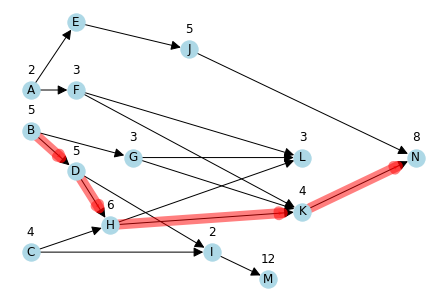

In [ ]:
# create a list of edges using the current critical path list:
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])]

# first, recreate the network visualization:
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=20)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs)

# now add the critical path as an additional layer on top of the original graph:
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=10, alpha=0.5, edge_color='r')

# again, leaving some margin so the labels are not cut off
plt.margins(0.01)

plt.savefig("critical.png")